In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
file_path = "../data/cleaned_data.csv"
df = pd.read_csv(file_path)

# Features and target
X = df.drop(columns=['genre', 'label'])
y = df['label']

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train and evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7208333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71        23
           1       0.90      1.00      0.95        46
           2       0.64      0.50      0.56        18
           3       0.50      0.41      0.45        17
           4       0.88      0.33      0.48        21
           5       0.61      0.65      0.63        17
           6       0.61      0.86      0.72        22
           7       0.80      1.00      0.89        41
           8       0.64      0.56      0.60        16
           9       0.50      0.37      0.42        19

    accuracy                           0.72       240
   macro avg       0.68      0.64      0.64       240
weighted avg       0.72      0.72      0.70       240



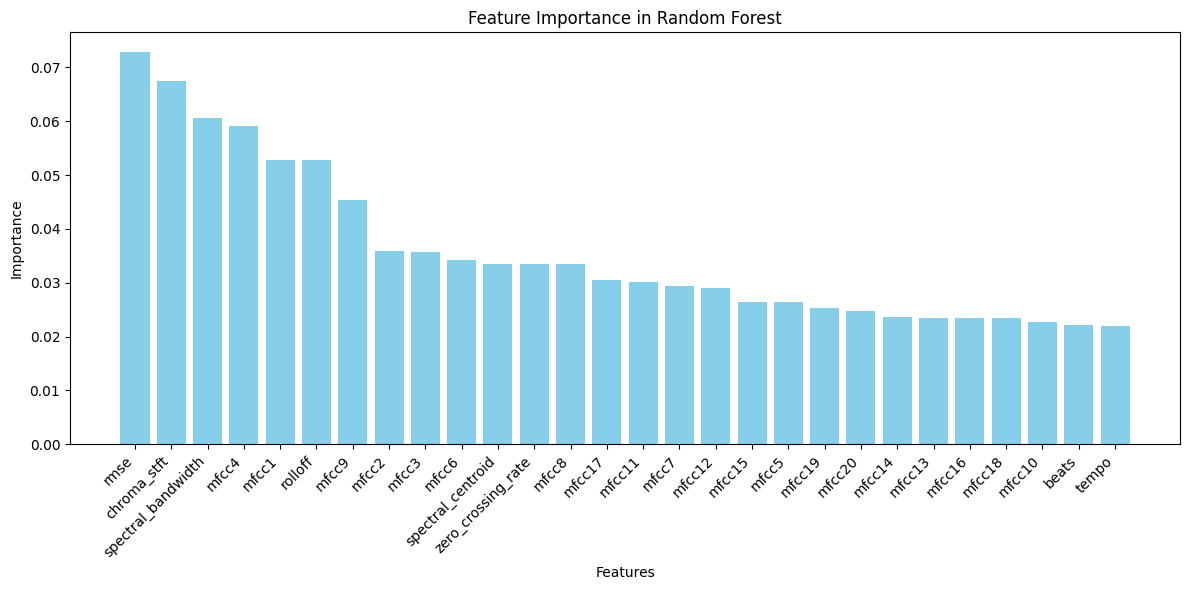

In [7]:
# Plot feature importance with angled labels
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = df.drop(columns=['genre', 'label']).columns

plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center", color="skyblue")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45, ha="right")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()  
plt.show()

In [4]:
# Create a mapping between numeric labels and genre names
label_mapping = df[['label', 'genre']].drop_duplicates().set_index('label')['genre'].to_dict()

# Print the mapping
print("Label-to-Genre Mapping:")
for label, genre in label_mapping.items():
    print(f"{label}: {genre}")

Label-to-Genre Mapping:
7: pop
1: classical
0: blues
2: country
3: disco
4: hiphop
5: jazz
6: metal
8: reggae
9: rock
